In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = sns.load_dataset('mpg')
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [6]:
data.shape
# 398행 9열

(398, 9)

In [3]:
# 열 확인
data.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      392 non-null float64
weight          398 non-null int64
acceleration    398 non-null float64
model_year      398 non-null int64
origin          398 non-null object
name            398 non-null object
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [5]:
# 결측치 확인 : horsepower 6개
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [5]:
data.cylinders.nunique()

5

#### Seaborn 활용

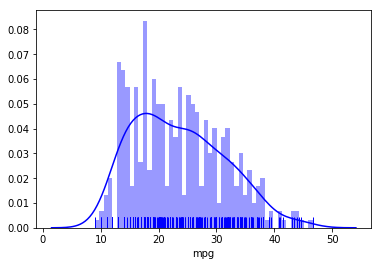

In [10]:
sns.distplot(data.mpg, kde = True, rug = True, bins = 50, color = 'blue')
plt.show()

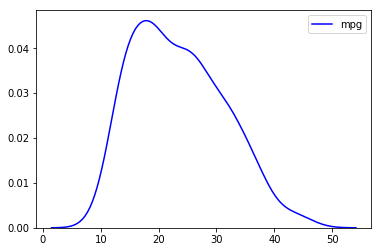

In [11]:
# KDE
sns.kdeplot(data.mpg, color = 'blue')
plt.show()

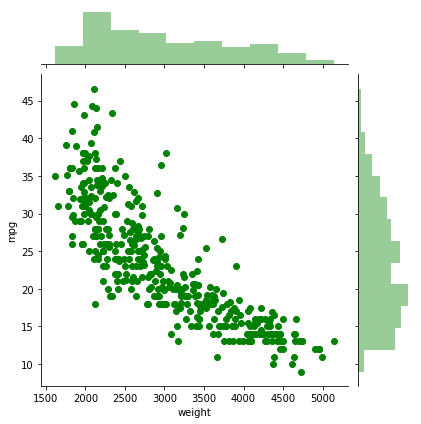

In [13]:
sns.jointplot(x='weight', y ='mpg', data = data, color = 'green', kind = 'scatter')
plt.show()

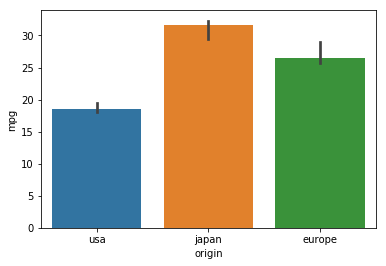

In [18]:
# 막대 그래프
sns.barplot(x='origin', y = 'mpg', data = data, estimator = np.median)
plt.show()

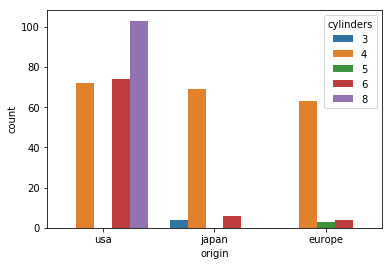

In [19]:
# countplot
# 도수 분포표 - > 막대그래프 형태

sns.countplot(x='origin', data=data, hue = 'cylinders')
plt.show()

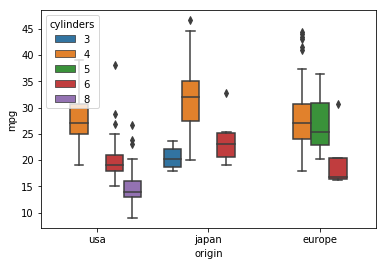

In [20]:
# boxplot
# 인자 hue의 값으로 또 다른 변수 포함

sns.boxplot(x='origin', y = 'mpg', data = data, hue = 'cylinders')
plt.show()

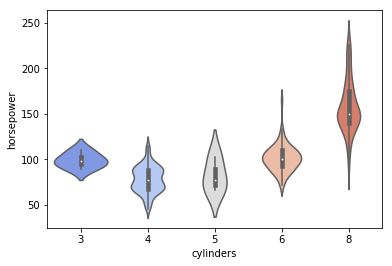

In [21]:
# 다중 바이올린
sns.violinplot(x='cylinders', y ='horsepower', data = data, palette = 'coolwarm')
plt.show()

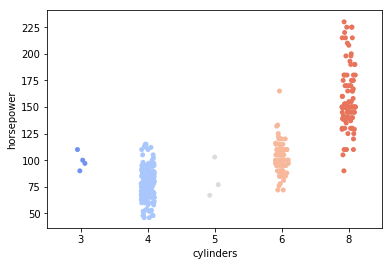

In [6]:
# strip plot

sns.stripplot(x='cylinders', y = 'horsepower', data = data, palette = 'coolwarm')
plt.show()

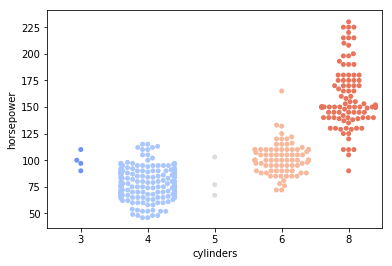

In [7]:
# swarm plot

sns.swarmplot(x = 'cylinders', y = 'horsepower', data = data, palette = 'coolwarm')
plt.show()

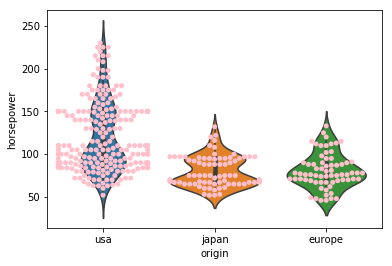

In [8]:
# violin + swarm

sns.violinplot(x = 'origin', y = 'horsepower', data = data)
sns.swarmplot(x = 'origin', y = 'horsepower', data=data, color = 'pink')
plt.show()

In [20]:
# 행렬 시각화 - 상관계수
x = data.corr()
x

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


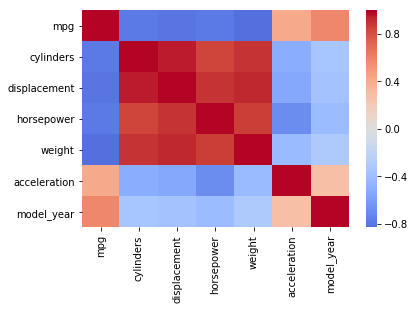

In [21]:
# heatmap
sns.heatmap(x , cmap='coolwarm', center = 0)
plt.show()

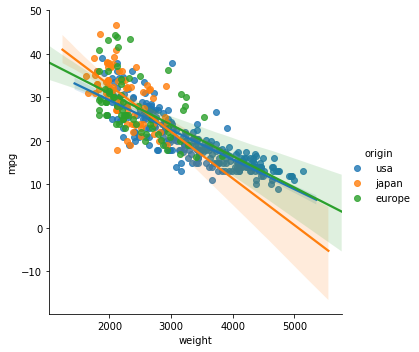

In [22]:
# 산점도 + 회귀선
# 하나의 그래프에 여러 개의 유형 시각화

sns.lmplot(data=data, x='weight', y ='mpg', hue='origin')
plt.show()

C:\Users\user\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


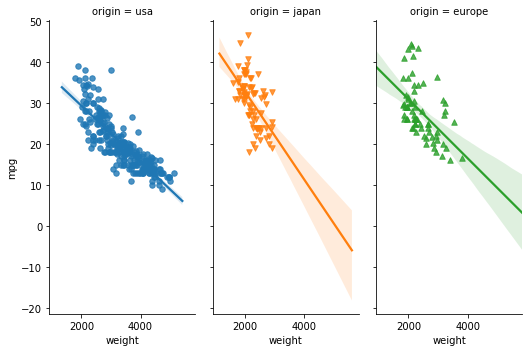

In [23]:
# 산점도 + 회귀선
# 다중 시각화
# 그래프 비율, 크기 조정

sns.lmplot(data=data, x='weight', y ='mpg', col='origin', hue='origin',
          markers=['o', 'v', '^'], scatter_kws = {'s':30}, aspect = 0.5, size=5)
plt.show()

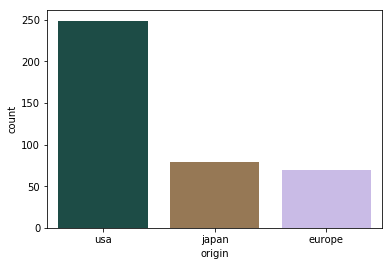

In [24]:
#도수분포표 - > 막대 그래프

sns.countplot(x='origin', data=data, palette = 'cubehelix')
plt.show()

<br>

### iris 데이터

In [13]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [14]:
iris.shape

(150, 5)

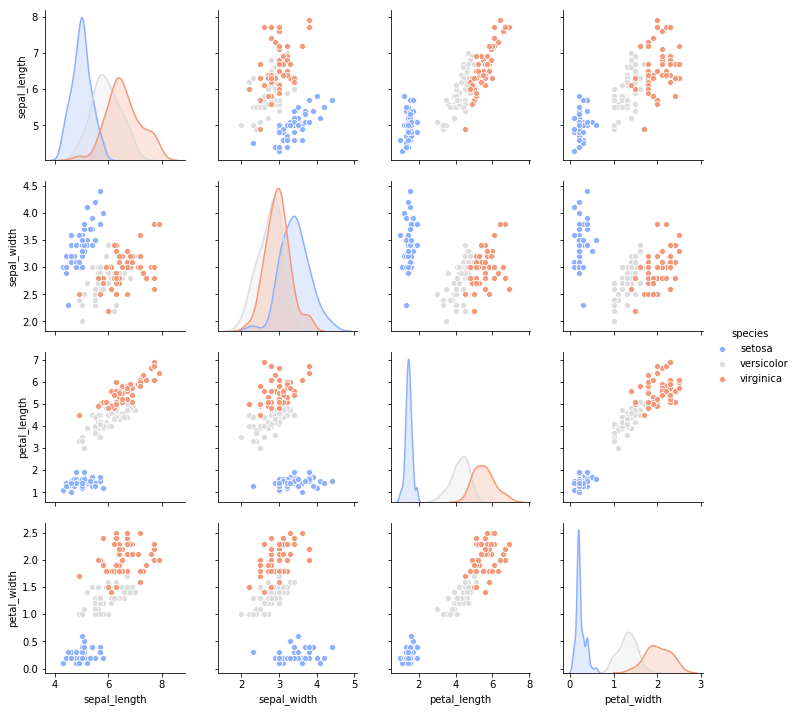

In [15]:
# 산점도 행렬
sns.pairplot(iris, hue = 'species', palette = 'coolwarm')
plt.show()

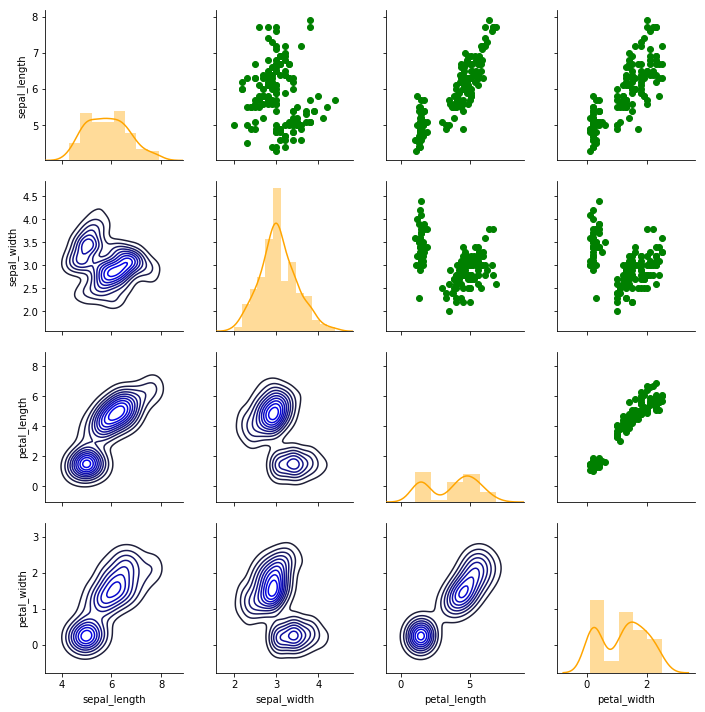

In [17]:
# 혼합 유형의 시각화 행렬
g = sns.PairGrid(iris)
g.map_diag(sns.distplot, color = 'orange')
g.map_upper(plt.scatter, color = 'green')
g.map_lower(sns.kdeplot, color = 'blue')
plt.show()

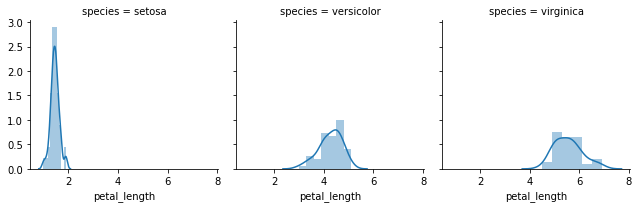

In [18]:
# 다중 시각화
# 다중 히스토그램
g = sns.FacetGrid(data=iris, col='species')
g.map(sns.distplot, 'petal_length')
plt.show()

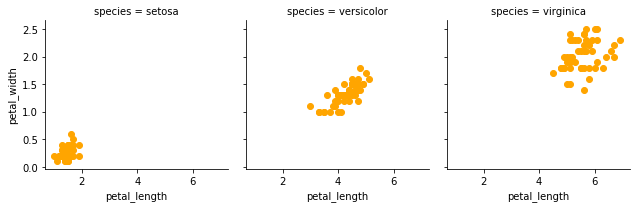

In [19]:
# 다중 산점도
g = sns.FacetGrid(data=iris, col='species')
g.map(plt.scatter, 'petal_length', 'petal_width', color = 'orange')
plt.show()

In [ ]:
# 행렬 시각화

